분류 모델

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩
iris = load_iris()
iris.keys()
# iris.data는 iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있음
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정값) 데이터를 numpy로 가지고 있음
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

In [ ]:
# DecisionTreeClassifier 객체 생성

dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [ ]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


### [결정 트리]  

Decision Tree : 의사결정 나무라는 의미. 트리 구조를 사용, 각 분기점(node)에는 분석 대상의 속성들이 위치

* 각 분기점마다 목표 값을 잘 분류할 수 있는 속성을 찾아서 배치
 - 해당 속성이 갖는 값을 이용하여 새로운 가지(branch)를 만듬
 - 데이터를 분류시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 하는데 최대한 균일한
   데이터 세트를 구성할 수 있도록 분할하는 것이 필요
 - 결정 노드는 정보 균일도가  높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만드는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측
* 데이터 분류 시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
 - 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듬
 - 정보의 균일도라는 룰을 기반으로 알고리즘이 쉽고 직관적이며 어떻게 규칙 노드와 리프 노드가
   만들어지는지  알수 있고 시각화로 표현할 수 있는 장점
 - 균일도가 다양하게 존재할 수록 트리의 깊이가 커지고 복잡해 지며 과적합으로 정확도가 떨어진다는 단점
 - 모든 데이터 상황을 만족하는 완벽한규칙은 없다고 인정하고 더 나은 성능을 보장하기 위하여 성능 튜닝을 통하여 트리의 크기를 사전에 제한하는 것이 요구됨
 - 정보 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득 지수와 지니 계수가 있음
 - 정보 이득은 엔트로피 개념을 기반으로 하며 엔트로피는 주어진 데이터 집합의 혼잡도임. 서로 다른 값이 섞여 있으면 엔트로피 높음  정보 이득이 높은 속성을 기준으로 분할
 - 지니 계수는 경제학에서 불평등 지수를 나타낼 때 사용하는 계수. 0이 가장 평등하고 1로 갈수록 불평등.
   지니 지수는 얼마나 불확실한가(얼마나 섞여있는가?)를 보여주며 지니지수가 0이란 것은 불확실성이 0이다라는 것으로 같은 특성을 가진 객체끼리 잘 모여있다는 의미
* 결정 트리 구조 : 규칙 노드(규칙 조건), 리프 노드(결정된 클래스 값), 서브 트리(새로운 규칙 조건마다 규칙 노드 기반의 서브트리 생성)
* 하이퍼 파라미터 : 학습 프로세스가 시작되기 전에 설정되는 매개변수로서 의사결정 트리가 구축되는 방식에 영향을 주어 구조와 성능에 영향을 준다.
 - 최대 깊이(max_depth):
    - 설명: 트리의 최대 깊이. 이는 뿌리와 잎 사이의 최대 길이.
    - 영향: 트리가 깊어지면 더 복잡한 패턴을 포착할 수 있지만 과적합이 발생할 수 있다. 더 얕은 나무는 적합하지 않을 수 있다.
 - 최소 샘플 분할(min_samples_split):
    - 설명: 분할을 고려하기 위해 노드에 있어야 하는 최소 샘플 수를 정의. (분할 전)
    - 영향: 값이 높을수록 모델이 매우 특정한 패턴(과적합)을 학습하는 것을 방지하는 반면, 값이 낮을수록 데이터에서 노이즈가 포착될 수 있다.
 - 최소 샘플 리프(min_samples_leaf):
    - 설명: 분할 후 리프 노드에 있어야 하는 최소 샘플 수를 설정.
    - 영향: min_samples_split과 유사하게 과적합을 제어. 값이 높을수록 샘플이 거의 없는 리프 노드가 생성되지 않는다.
 - 최대 기능(max_features):
    - 설명: 노드 분할을 위해 고려되는 최대 기능 수.
    - 영향: 이 수를 줄이면 앙상블 모델에서 트리의 다양성이 증가할 수 있지만 중요한 기능이 제외될 수도 있다.
 - 기준(기준):
    - 설명 : 분할 품질을 측정하는 데 사용되는 기능. 일반적인 기준에는 지니 불순물에 대한 "gini", 분류 트리의 정보 이득에 대한 "엔트로피", 회귀 트리에 대한 "mse"(평균 제곱 오류)가 포함.
    - 영향: 기준 선택은 나무가 자라는 방식에 영향을 미치고 모델 성능에 영향을 미칠 수 있다.
 - 최대 리프 노드(max_leaf_nodes):
    - 설명: 트리의 최대 리프 노드 수.
    - 영향: 트리의 크기와 복잡성을 제어하는 ​​데 사용할 수 있다. 리프 노드가 많을수록 더 복잡한 모델이 가능.

* 장점:
 - 해석성: 전문가가 아니더라도 쉽게 이해하고 해석할 수 있습니다.
 - 데이터 정규화 필요 없음: 데이터 정규화가 필요하지 않습니다.
 - 비선형 관계 처리: 기능 간의 비선형 관계를 처리할 수 있습니다.
* 단점:
 - 과적합: 잡음이 있는 데이터를 과적합하는 경향이 있습니다.
 - 불안정성: 데이터의 작은 변화로 인해 완전히 다른 트리가 나타날 수 있습니다.
 - 편향된 트리: 지배적인 클래스에 편향되어 있습니다.

https://ratsgo.github.io/machine%20learning/2017/03/26/tree/

지니계수 산출 사례
- 지니계수가 0인 경우 완전한 평등 : 소득 배열: [20, 20, 20, 20, 20]
- 지니계수가 1인 경우 한 명만 100의 소득을 가지고, 나머지는 모두 0의 소득 [0, 0, 0, 0, 100]

$G=1−∑
i=1
n
​
 (L
i
​
 +L
i−1
​
 )(P
i
​
 −P
i−1
​
 )=1−(0+0.2)⋅0.2=1−0.2⋅1=1−0=1$

$ 여기서
𝐿
𝑖
L
i
​
 는 누적 소득 비율,
𝑃
𝑖
P
i
​
 는 누적 인구 비율입니다.

인구 비율 (P): [0, 0.2, 0.4, 0.6, 0.8, 1.0]
소득 비율 (L): [0, 0, 0, 0, 0, 1]$

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Pruning(가지치기) : 맨 마지막 leaf노드들이 root노드까지 바로 가는데 걸리는 조건 (edge)의 개수인 깊으를 제한
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=156)
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=156)
dt_clf = DecisionTreeClassifier(criterion='gini', min_samples_split=5, random_state=156)
dt_clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=4, random_state=156)

# 붓꽃 데이터 세트를 로딩
iris = load_iris()
iris_data = iris.data
iris_target = iris.target
feature_names = iris.feature_names

# 데이터와 타겟을 각각 iris.data와 iris.target으로 사용
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=156)

# 학습 데이터를 기반으로 DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

# 예측 정확도 측정
accuracy = accuracy_score(y_test, pred)
print('예측 정확도: {0:.4f}'.format(accuracy))


예측 정확도: 0.9333


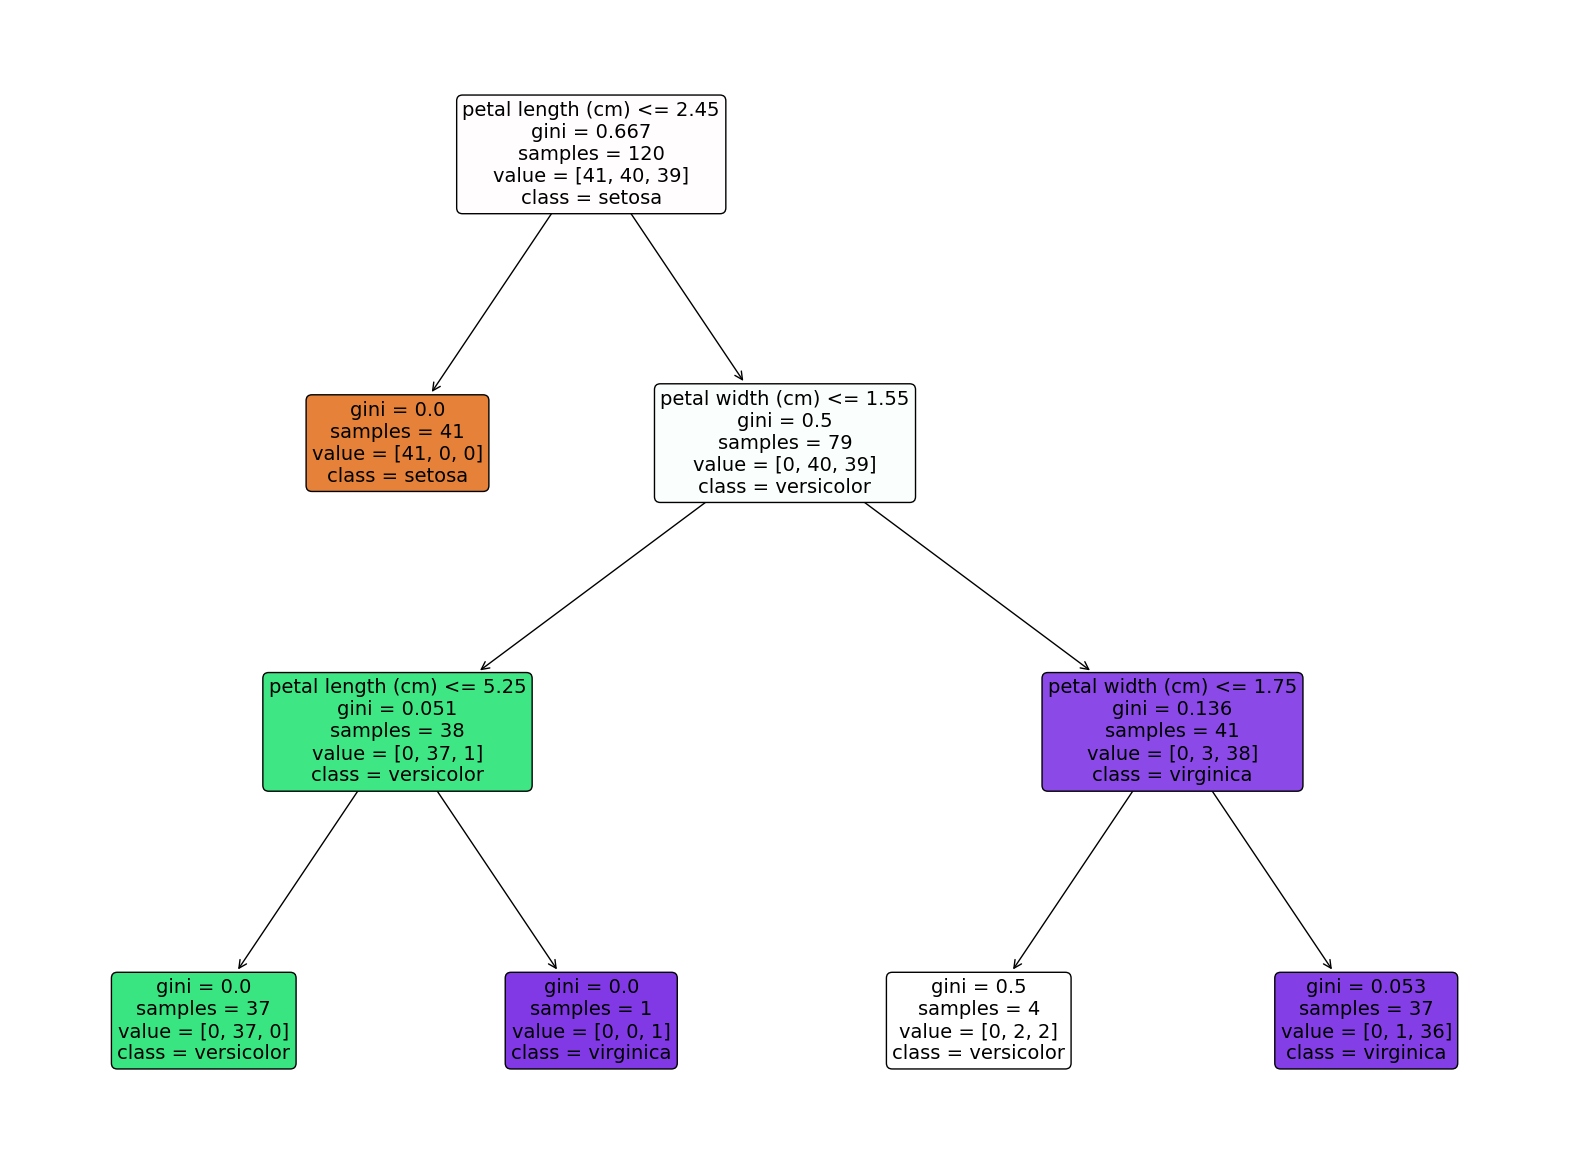

In [ ]:
# DT 시각화
# gini 계수는 엔트로피와 마찬가지로 낮을 수록 분류가 잘 된것으로 판단하며 기본적으로 의사결정나무는
# gini 계수와 엔트로피를 낮추는 방향으로 분류를 진행

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
tree.plot_tree(dt_clf, filled=True, # filled=True 각 노드를 클래스에 따라 다른 색으로 채움
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               rounded=True, fontsize=14)

plt.show()

- 꽃잎 길이가 2.0, 꽃잎 너비가 0.5인 꽃
- 꽃잎 길이가 3.0, 꽃잎 너비가 1.2인 꽃
- 꽃잎 길이가 5.0, 꽃잎 너비가 2.0인 꽃


Feature importances:
[0.    0.    0.558 0.442]

sepal length (cm): 0.000
sepal width (cm): 0.000
petal length (cm): 0.558
petal width (cm): 0.442


<Axes: >

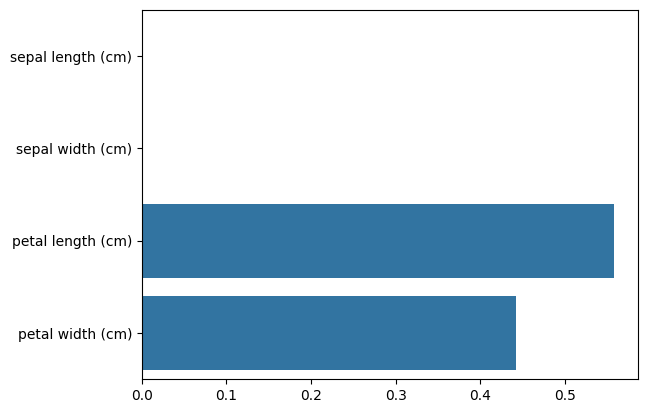

In [ ]:
import seaborn as sns
import numpy as np

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))
print()

# feature별 importance 매핑
# _로 끝나는 속성은 모델이 데이터에 대해 학습을 수행한 후에 생성되는 속성을 의미하고 자동으로 생성, 예로 feature_importances_
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print(f'{name}: {value:.3f}')

# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

In [ ]:
# Confusion matrix 를 활용한 정확도 비교
# 가지치기를 한 의사결정나무의 정확도가 가장 떨어진다. 하지만 학습데이터를 분류한 것이라는 사실을 염두해 두어야 함
# 만약 새로운 데이터가 들어오면 말했듯이 맨 마지막 가지치기의 의사결정나무가 일반화된 특징을 잡을 가능성이 높다
# array[0,0] = 50: 실제 클래스 0이면서 예측된 클래스 0인 경우 (정확한 예측)
# array[1,2] = 1: 실제 클래스 1이지만 예측된 클래스 2인 경우 (잘못된 예측)
# array[2,1] = 4: 실제 클래스 2이면서 예측된 클래스 1인 경우 (잘못된 예측)
# 1번 의사결정나무 - 지니계수 활용
# 2번 의사결정나무 - entropy 활용
# 3번 의사결정나무 -  가지치기 작업



from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target, dt_clf.predict(iris_data.data))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  4, 46]])

Q. load_breast_cancer 데이터셋을 불러와서 다음을 수행
- dt로 분류모델 생성 및 모델 정확도 평가(학습:검증=8:2)
- 하이퍼 파라미터는 분할 기준은 지니계수, 최대깊이는 3으로 설정
- 다양한 하이퍼 파라미터 설정하여 결과 확인
- 결정트리를 시각화

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
# print("cancer.keys(): \n", cancer.keys())
load_breast_cancer().keys()

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=156)
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('예측 정확도: {0:.4f}'.format(accuracy))

예측 정확도: 0.9561


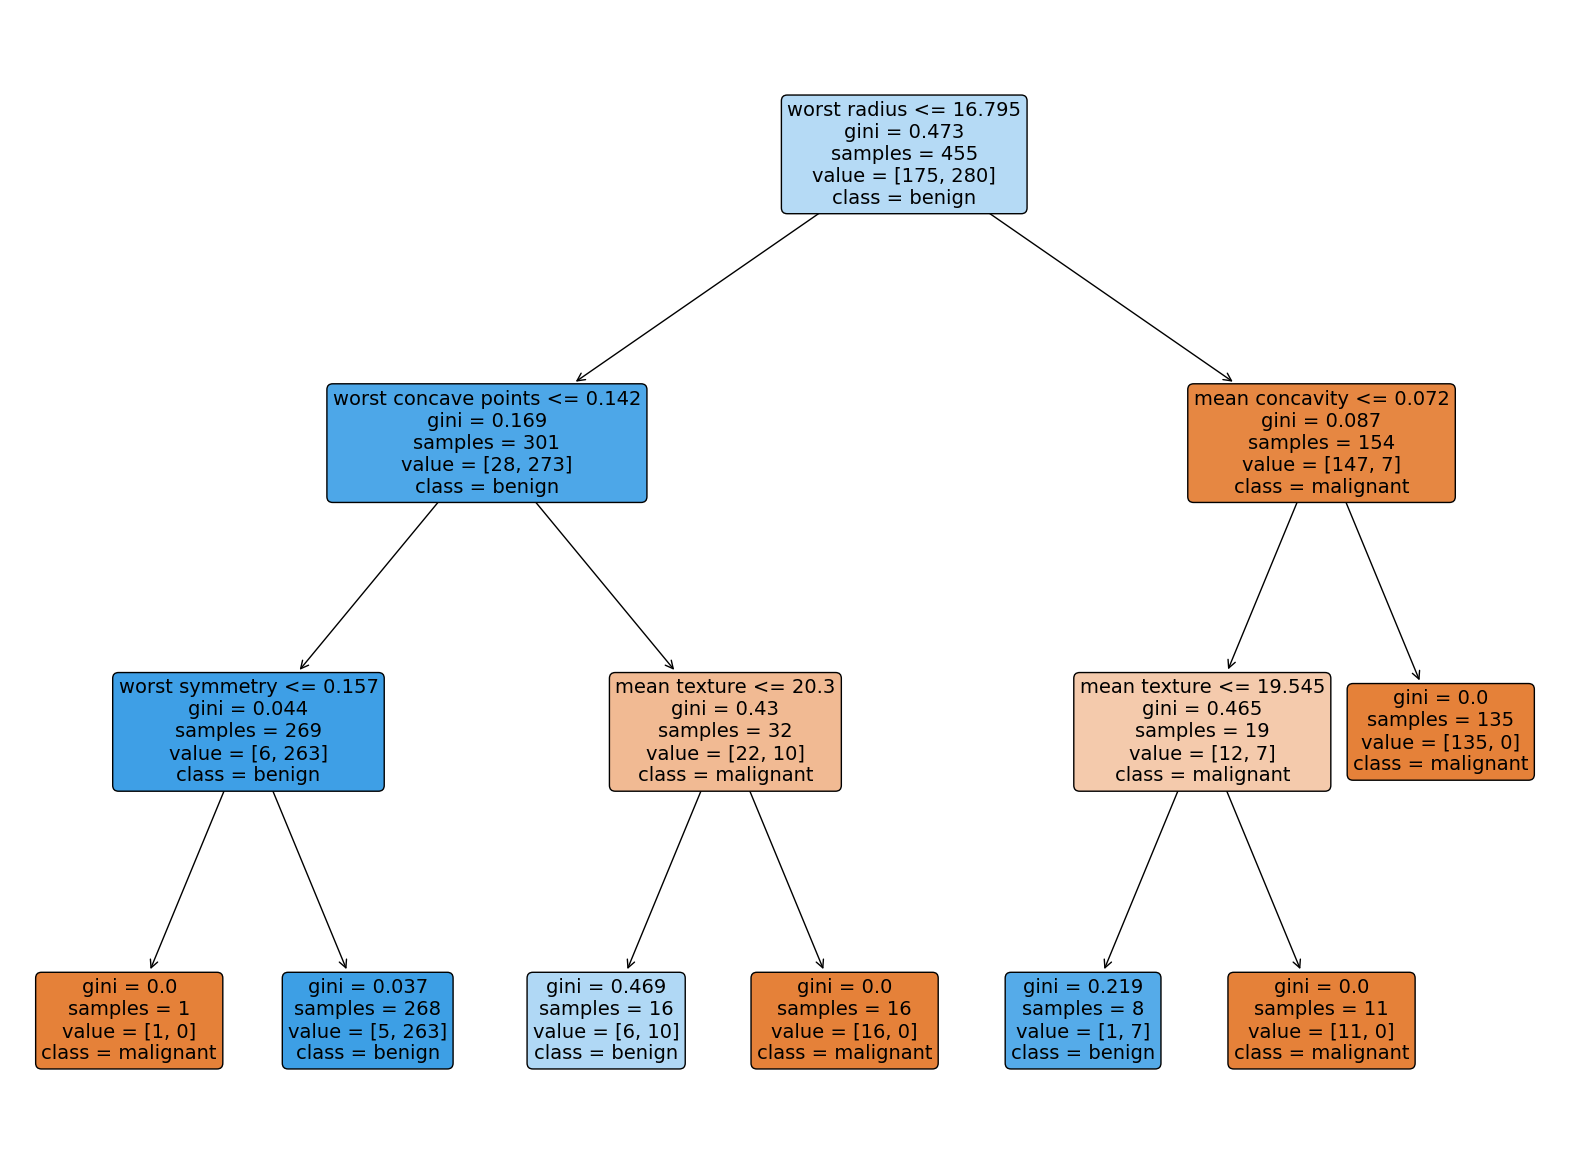

In [ ]:
plt.figure(figsize=(20,15))
tree.plot_tree(dt_clf, filled=True,
               feature_names = cancer.feature_names,
               class_names = cancer.target_names,
               rounded=True, fontsize=14)
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
# print("cancer.keys(): \n", cancer.keys())
load_breast_cancer().keys()

# stratify는 훈련/테스트 데이터들이 원래의 input dataset의 클래스의 비율과 같은 비율을 가지도록 할 것인지 지정
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2,
                                                    stratify=cancer.target, random_state=150)

# dt_tree = DecisionTreeClassifier()
dt_tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
dt_tree.fit(X_train, y_train)

pred = dt_tree.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('예측 정확도: {0:.4f}'.format(accuracy))


예측 정확도: 0.8860


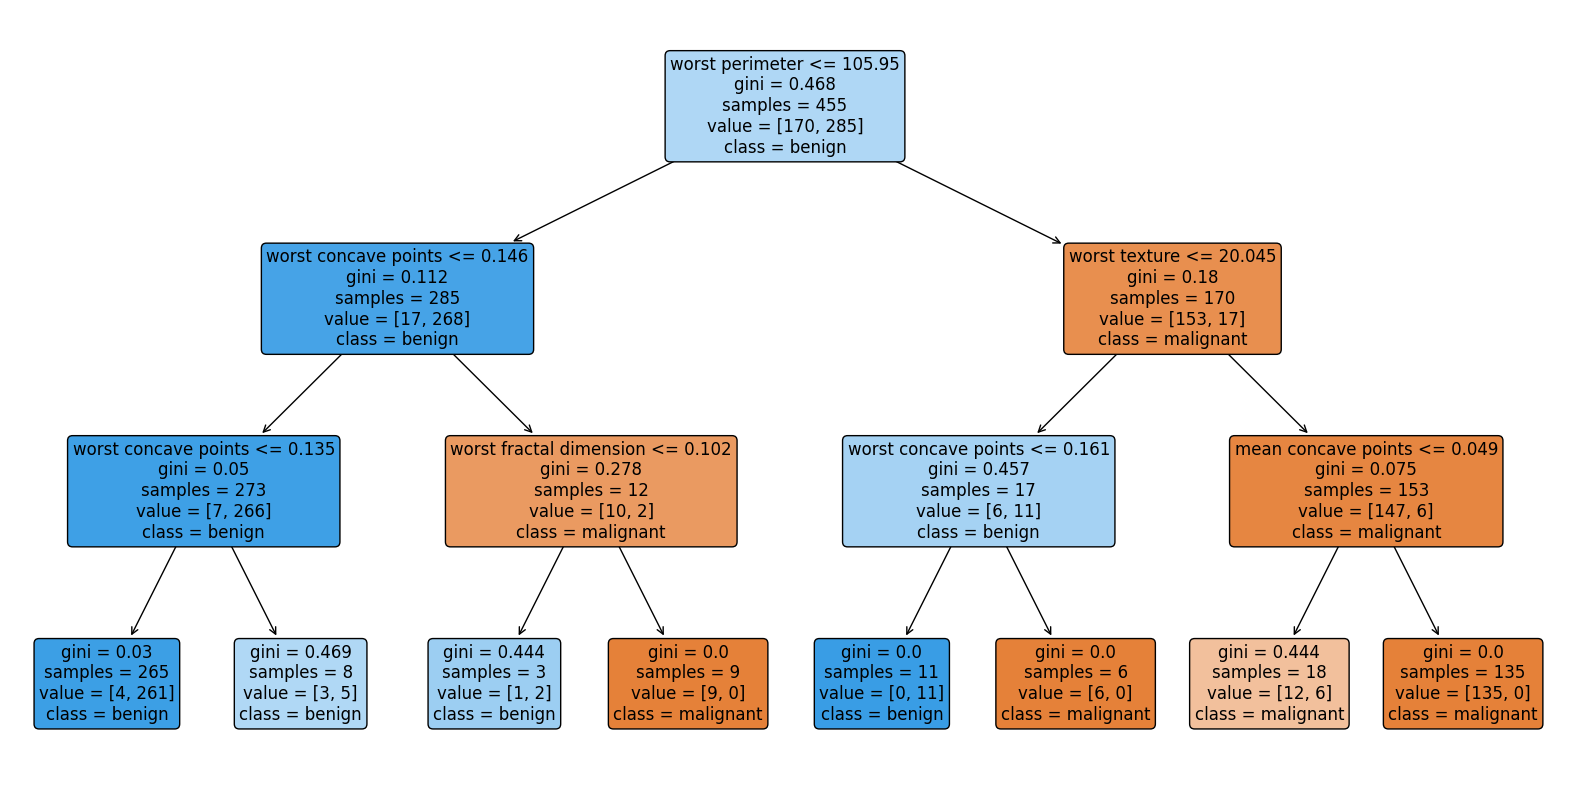

In [ ]:
# 시각화
from sklearn import tree
import matplotlib.pyplot as plt

dt_tree = DecisionTreeClassifier(max_depth=3)
dt_tree.fit(X_train,y_train)
pred = dt_tree.predict(X_test)
plt.figure(figsize=(20,10))
tree.plot_tree(dt_tree, filled=True,
              feature_names=cancer.feature_names,
              class_names=cancer.target_names,
              rounded=True, fontsize=12)
plt.show()
plt.close()

KNN 알고리즘


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KakaoTalk_20240724_123408566.png to KakaoTalk_20240724_123408566.png


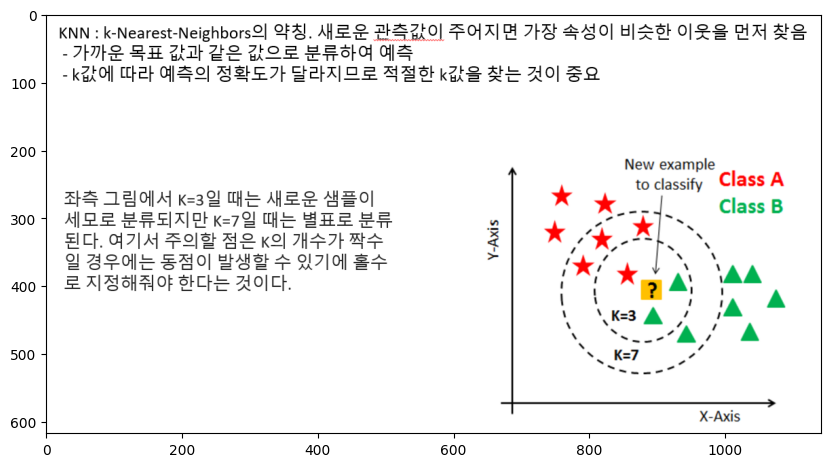

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
# from IPython.display import Image, display
# from PIL import Image as PImage
# import io

# Load the image

ima = mping.imread('KakaoTalk_20240724_123408566.png')

# Display the image
plt.figure(figsize=(10,10))
plt.imshow(ima)
plt.show()

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Initalize the KNN classifier with k neighbors
k = 5
knn = KNeighborsClassifier(n_neighbors=k) # default 5, k값은 데이터, 과적합 상황, 이상치 등을 감안해서 설정

# Train the KNN model
knn.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with k={k}: {accuracy:.2f}')

Accuracy with k=5: 0.97


Q. 사이킷런 dataset에 있는 load_breast_cancer 데이터에 대하여 KNN(k=3)알고리즘을 적용하여 분류 분석 모델링 및 평가를 수행하세요

In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy with k={k}: {accuracy:.2f}')

accuracy with k=3: 0.92


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 20240724_141026827.jpg to 20240724_141026827.jpg


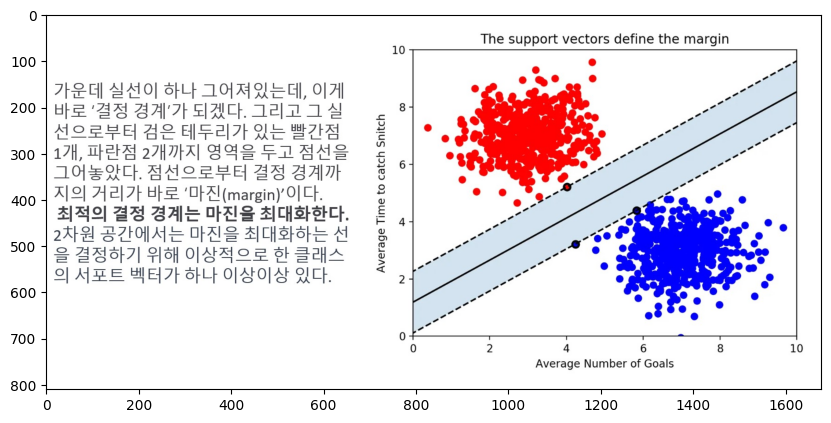

In [ ]:
ima = mping.imread('20240724_141026827.jpg')

# Display the image
plt.figure(figsize=(10,10))
plt.imshow(ima)
plt.show()

### 서포트 벡터 머신(Support Vector Machines, SVM)

- 분류나 회귀, 이상치 탐지 등에 사용되는 강력한 머신러닝 알고리즘 중 하나입니다. SVM은 주로 분류 문제에 사용되며, 이 알고리즘의 핵심 아이디어는 데이터를 고차원 공간으로 변환하여 서로 다른 클래스 간의 최대 마진을 찾는 것입니다.

- SVM은 데이터를 두 개의 클래스로 나누는 결정 경계(결정 초평면이라고도 함)를 찾습니다. 이 결정 경계는 각 클래스의 가장 가까운 훈련 샘플(서포트 벡터라고 함)까지의 거리가 최대가 되는 선을 찾는 것을 목표로 합니다. 이를 '마진 최대화'라고 하며, 이 마진 최대화는 오류를 최소화하고 모델의 일반화 성능을 향상시키는 데 중요한 역할을 합니다.

- SVM은 선형 뿐만 아니라 비선형 분류 문제에도 사용할 수 있습니다. 비선형 문제를 해결하기 위해, SVM은 커널 트릭이라는 기법을 사용하여 데이터를 고차원 공간으로 변환하고, 그 고차원에서 선형 결정 경계를 찾습...

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KakaoTalk_20240724_141326911.jpg to KakaoTalk_20240724_141326911.jpg


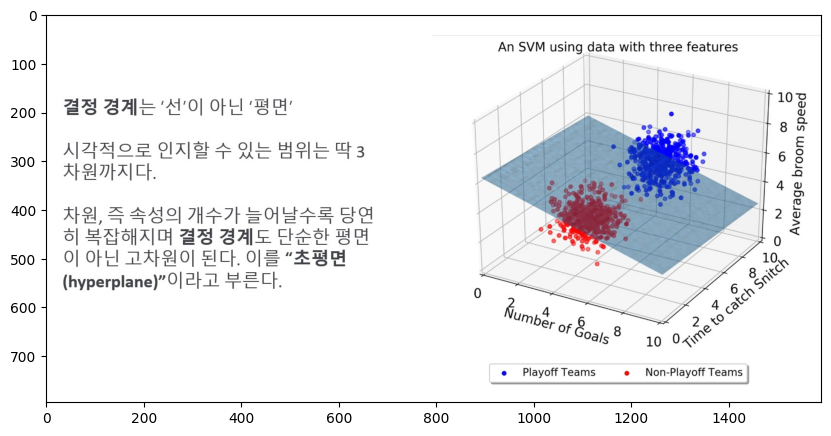

In [ ]:
ima = mping.imread('KakaoTalk_20240724_141326911.jpg')

# Display the image
plt.figure(figsize=(10,10))
plt.imshow(ima)
plt.show()

kernel
- SVM은 데이터를 분류하기 위해 결정 경계(Decision Boundary)라고 하는 분류선을 그리는데 이 때, kernel 매개변수는 이 결정 경계가 어떤 형태를 가질지 결정한다. kernel='linear'는 선형 결정 경계를 사용한다는 의미. 즉, 데이터가 선형적으로 분리될 수 있다고 가정하고, 그에 따른 최적의 직선을 찾는다. 이는 특징들이 선형 관계에 있다고 가정할 때 효과적. 다른 커널 유형으로는 poly(다항식), rbf(방사 기저 함수), sigmoid 등이 있으며, 이들은 비선형적 데이터를 처리하는 데 유용.

C=1.0
- C 매개변수는 SVM 분류기의 정규화 매개변수. 이 값은 모델이 각각의 데이터 포인트들을 얼마나 정확하게 분류할 것인지를 결정.
- C 값이 높으면 모델은 훈련 데이터에 대해 더 정확하게 분류하려고 하며 이는 결정 경계가 개별 데이터 포인트에 더 밀접하게 맞추어져 있는 상태를 의미. 하지만 이는 과적합(Overfitting)의 위험을 증가시킬 수 있다.
- 반대로 C 값이 낮으면 모델은 이러한 개별 데이터 포인트들에 덜 민감하게 된다. 즉, 결정 경계가 더 많은 데이터 포인트를 잘못 분류할 수 있지만, 일반적으로 더 일반화된(Generalized) 모델을 만들 수 있다.
- C=1.0은 기본값으로, 상대적으로 균형 잡힌 정규화 수준을 제공. 이 값은 문제에 따라 조정될 수 있으며, 특정 데이터셋에 대한 모델의 성능을 최적화하는 데 사용.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the iris dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset inti a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SVM Classifier
svm = SVC(kernel='linear', C=1.0, random_state=42) # kerner = 'linear' 선형 커널을 사용하겠다는 것이고 c=1.0은 정규화 매개변수

# Train the modl using the training set
svm.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = svm.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the iris dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset inti a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of C values to try
C_values = [0.01, 0.1, 1, 10, 100]

# Dictionary to store the accuracy for each Cvalue

accuracy_dict ={}

for C in C_values:
    # Create a SVM Classifier with different Cvalues
    svm = SVC(kernel='linear', C=C, random_state=42)

    # Train the model using the training sets
    svm.fit(X_train, y_train)

    # Predict the response for the test dataset
    y_pred = svm.predict(X_test)

    # Calculate and print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[C] = accuracy
    print(f"C: {C}, Accuracy: {accuracy:.2f}")

C: 0.01, Accuracy: 0.96
C: 0.1, Accuracy: 0.96
C: 1, Accuracy: 0.96
C: 10, Accuracy: 0.96
C: 100, Accuracy: 0.96


SVC 커널

- 선형 커널 (SVC(kernel='linear')): 선형 커널은 간단하고 빠르며, 데이터가 선형적으로 구분될 때 좋은 성능을 보입니다. Wine 데이터셋에서 선형 커널이 적합한지 확인해보면, 일부 클래스 간의 분류가 충분하지 않을 수 있습니다.
- 다항식 커널 (SVC(kernel='poly')): 다항식 커널은 비선형적으로 분포된 데이터를 더 잘 처리할 수 있습니다. 차수가 증가함에 따라 모델이 더 복잡해지고, 데이터의 패턴을 더 잘 포착할 수 있지만, 과적합의 위험이 있습니다.
- RBF 커널 (SVC(kernel='rbf')): RBF 커널은 비선형적인 경계를 가진 데이터에서 가장 효과적입니다. Wine 데이터셋의 복잡한 패턴을 잘 포착할 수 있으며, 높은 성능을 기대할 수 있습니다.

####  앙상블 학습

* 앙상블 학습의 유형은 보팅, 배깅, 부스팅 세가지로 나눌 수 있으며 이외에도 스태깅을 포함한 다양한 앙상블 방법이 있다.
* 보팅의 경우 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이다.
* 정형 데이터의 예측 분석 영역에서는 매우 높은 예측 성능. Bagging 과 Boosting
* 배깅 방식의 대표인 Random Forest는 뛰어난 예측 성능, 상대적으로 빠른 수행시간, 유연성 등으로 애용.
* 부스팅의 효시는 Gradient Boosting, 한 단계 발전시키면서도 시간 단축시킨 XgBoost, LightGBM이 정형 데이터의 분류 영역에서
  활용도 확대
* 앙상블의 앙상블이라고 불리는 스태킹 기법
* 앙상블의 기본 알고리즘은 결정 트리

Voting Classifier
- 하드 보팅 : 다수결 원칙, 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정
- 소프트 보팅 : 분류기들의 레이블 값 결정 확률을 모두 더해서 평균하고 이들 중 가장 높은 레이블 값을 최종 보팅 결과값으로 선정

In [ ]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

# print(cancer.data)
# print(cancer.target)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression(max_iter=500, solver='lbfgs')
knn_clf = KNeighborsClassifier(n_neighbors=9)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier( estimators=[('LR', lr_clf),('KNN', knn_clf)] , voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9649


In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier(n_neighbors=9)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier( estimators=[('LR', lr_clf),('KNN', knn_clf)] , voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

voting 분류기 정확도: 0.9386
DecisionTreeClassifier 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9649


#### Random Forest
여러 개의 의사결정 트리(Decision Trees)를 조합하여 작동하는 앙상블 학습 방법의 하나로 다수의 의사결정 트리를 생성하고, 각각의 트리가 데이터에 대한 예측을 수행한 후, 이 예측들을 결합하여 최종 예측 결과를 도출

베깅(Bagging), 또는 부트스트랩 어그리게이팅(Bootstrap Aggregating)은 앙상블 학습 방법 중 하나로, 모델의 분산을 줄이고 오버피팅을 방지하기 위해 사용.

베깅의 핵심 아이디어와 방식

- 부트스트랩 샘플링:
베깅은 원본 훈련 데이터 세트에서 복원 추출 방식(하나의 데이터 포인트를 여러 번 샘플링할 수 있음)을 사용하여 여러 개의 서브셋(부트스트랩 샘플)을 생성. 각 부트스트랩 샘플은 원본 데이터 세트와 크기는 같지만, 일부 데이터는 중복되고 일부 데이터는 누락될 수 있다.
- 독립적인 모델 훈련:
생성된 각 서브셋은 독립적인 모델(예: 의사결정 트리)을 훈련시키는 데 사용. 이렇게 함으로써, 각 모델은 데이터의 다른 측면을 학습하게 된다.
- 결과의 결합:
훈련된 모든 모델의 예측 결과는 결합되어 최종 결과를 생성.
분류 문제의 경우, 일반적으로 다수결(voting) 방식이 사용되며, 회귀 문제의 경우에는 평균이 사용.

베깅의 장점
- 분산 감소: 여러 모델의 예측을 결합함으로써 개별 모델이 가질 수 있는 높은 분산을 줄일 수 있다.
- 오버피팅 방지: 부트스트랩 샘플링으로 인해 각 모델이 훈련 데이터의 다른 측면을 학습하므로, 오버피팅을 방지하는 데 도움이 된다.
- 병렬 처리 가능: 각 모델은 독립적으로 훈련되므로, 병렬 처리가 가능해져 계산 효율성이 높다.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KakaoTalk_20240724_154051764.jpg to KakaoTalk_20240724_154051764.jpg


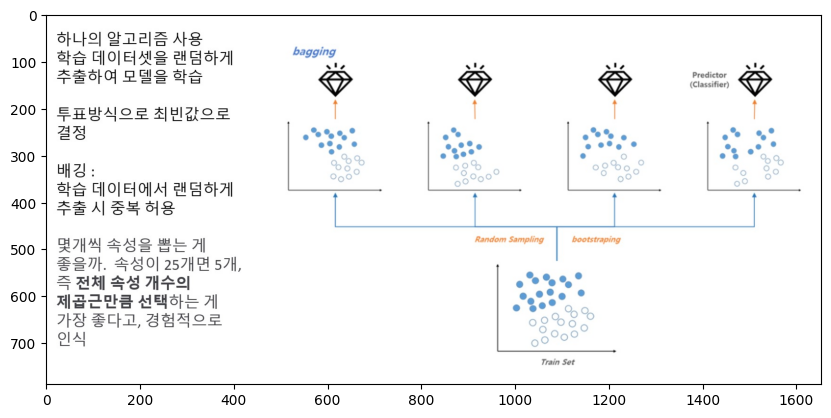

In [ ]:
ima = mping.imread('KakaoTalk_20240724_154051764.jpg')

# Display the image
plt.figure(figsize=(10,10))
plt.imshow(ima)
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


# Load the iris dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset inti a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


주요 하이퍼파라미터

n_estimators:
- 설명: 랜덤포레스트에 포함될 결정 트리의 개수를 지정합니다.
- 기본값: 100
- 영향: 트리의 개수가 많을수록 모델의 안정성과 성능이 향상될 수 있지만, 연산 비용도 증가합니다.

max_depth:
- 설명: 각 트리의 최대 깊이를 설정합니다.
- 기본값: None (리프 노드가 순수해질 때까지 또는 min_samples_split보다 적은 샘플을 가질 때까지 계속 분할)
- 영향: 깊이가 깊을수록 모델이 복잡해지고 과적합할 가능성이 커집니다.

min_samples_split:
- 설명: 내부 노드를 분할하는 데 필요한 최소 샘플 수입니다.
- 기본값: 2
- 영향: 큰 값은 과적합을 방지하는 데 도움이 됩니다.

min_samples_leaf:
- 설명: 리프 노드에 있어야 하는 최소 샘플 수입니다.
- 기본값: 1
- 영향: 큰 값은 과적합을 방지하고, 트리의 일반화 능력을 향상시킬 수 있습니다.

max_features:
- 설명: 각 분할에서 고려할 최대 특성 수입니다.
- 옵션: auto, sqrt, log2, 또는 정수 값
- 기본값: auto (모든 특성을 사용)
- 영향: 특성 수가 적을수록 모델의 다양성이 증가하지만, 너무 적으면 성능이 떨어질 수 있습니다.